In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
fashion_minst=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_minst.load_data()

In [3]:
X_train_full.shape,y_train_full.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [5]:
X_train_full[0].shape

(28, 28)

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [13]:
weights,bias=hidden1.get_weights()

In [14]:
weights

array([[ 0.06265876, -0.07373714, -0.06403284, ..., -0.03938808,
         0.06082803, -0.02644013],
       [ 0.04726262,  0.0597956 ,  0.01993836, ..., -0.02428309,
        -0.03067421,  0.00396191],
       [-0.05419221,  0.01792739, -0.05717783, ...,  0.05016905,
         0.00601205, -0.00791764],
       ...,
       [ 0.01959699, -0.05913421,  0.07382253, ...,  0.04692734,
         0.01485914,  0.04222517],
       [ 0.05463009, -0.00163701,  0.03632306, ...,  0.07368933,
         0.00925449, -0.04771208],
       [-0.07054302, -0.00414909, -0.05211899, ...,  0.00622396,
        -0.05465267,  0.00436758]], dtype=float32)

In [15]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [17]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7293 - accuracy: 0.7616 - val_loss: 0.5196 - val_accuracy: 0.8246
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4891 - accuracy: 0.8290 - val_loss: 0.4517 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4423 - accuracy: 0.8457 - val_loss: 0.4223 - val_accuracy: 0.8556
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4164 - accuracy: 0.8547 - val_loss: 0.3935 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3960 - accuracy: 0.8598 - val_loss: 0.4078 - val_accuracy: 0.8574
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3807 - accuracy: 0.8661 - val_loss: 0.3814 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8720 - val_loss: 0.3849 - val_accuracy:

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.729292,0.761582,0.519552,0.8246
1,0.489135,0.829000,0.451718,0.8442
2,0.442330,0.845727,0.422292,0.8556
3,0.416438,0.854655,0.393531,0.8604
4,0.396026,0.859782,0.407841,0.8574


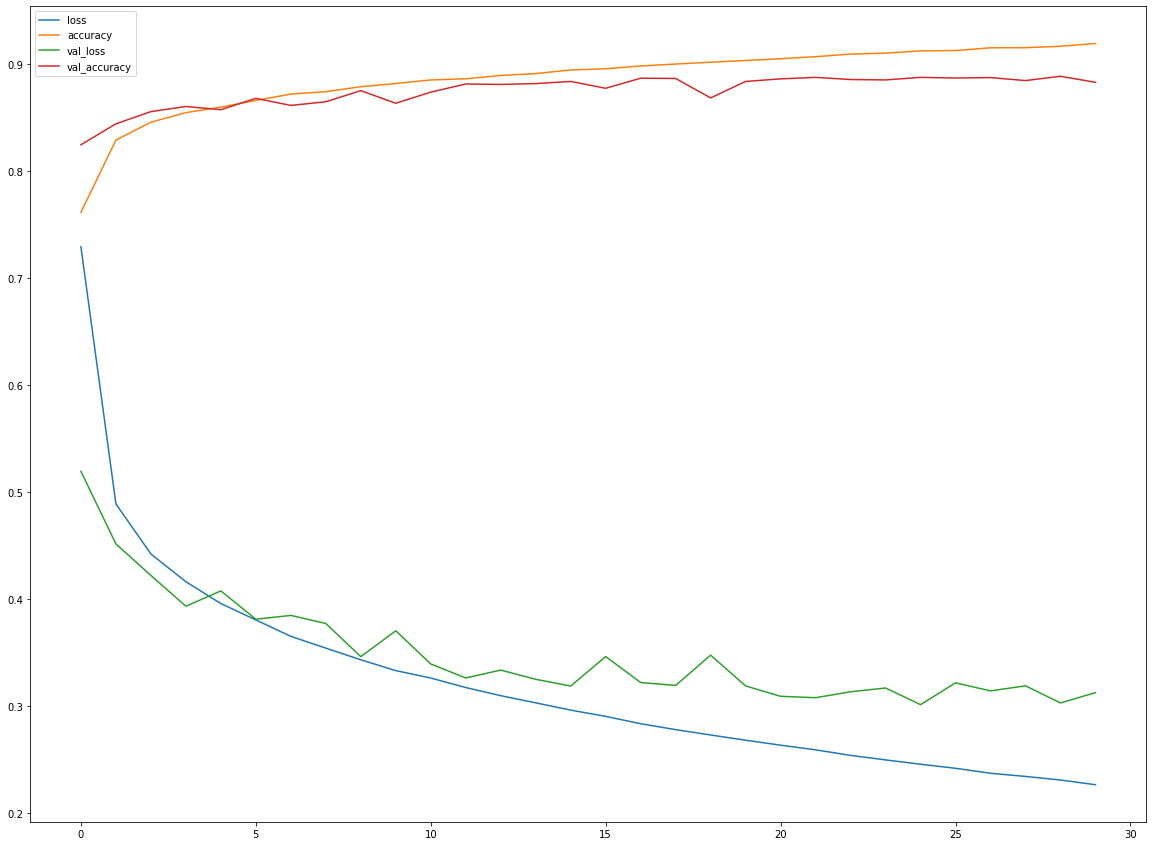

In [20]:
pd.DataFrame(history.history).plot(figsize=(20,15))

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 58.7287 - accuracy: 0.8528


[58.72868728637695, 0.8528000116348267]

In [22]:
X_new=X_test[:5]
pred=model.predict(X_new)
pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [23]:
pred_class=model.predict_classes(X_new)
pred_class

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, 1, 6])

In [24]:
np.array(class_names)[pred_class]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [25]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

## Now Regression

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
housing=fetch_california_housing()

In [28]:
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)

In [30]:
X_train.shape,y_train.shape

((11610, 8), (11610,))

In [31]:
X_train[1:].shape

(11609, 8)

In [32]:
model1=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape),
    keras.layers.Dense(1)
    
])

In [33]:
model1.compile(loss='mean_squared_error',
              optimizer='sgd')

In [34]:
hist=model1.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1652 - val_loss: 0.5199
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4775 - val_loss: 0.4344
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4114 - val_loss: 0.4097
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3934 - val_loss: 0.4015
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3823 - val_loss: 0.4022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3814 - val_loss: 0.3944
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3718 - val_loss: 0.3846
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3695 - val_loss: 0.3847
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3722 - val_loss: 0.3806
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3672 - val_loss: 0.3823

In [35]:
model1.evaluate(X_test,y_test)

162/162 [==============================] - 0s 955us/step - loss: 0.3616


0.36164653301239014

In [36]:
X_new = X_test[:5] # pretend these are new instances
y_pred = model1.predict(X_new)
y_pred

array([[0.6531215],
       [4.2047358],
       [1.3520272],
       [2.0213702],
       [2.2256804]], dtype=float32)

In [37]:
y_test[:5]

array([0.694, 4.   , 1.371, 1.227, 2.16 ])

## Functional API

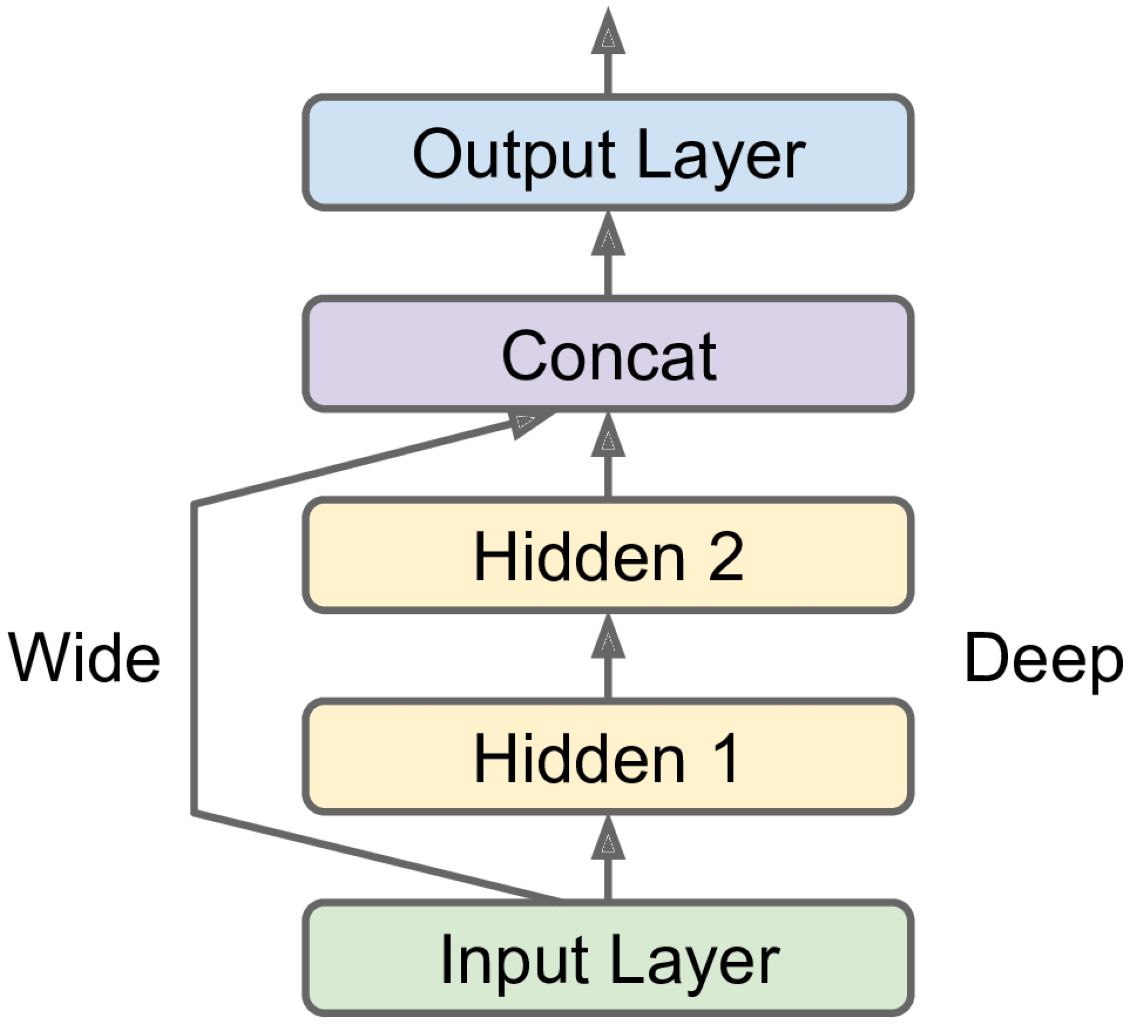

In [38]:
path='/home/aakashkhadka/Pictures/Functional_api.png'
img=plt.imread(path)
plt.figure(figsize=(20,25))
plt.axis('off')
plt.imshow(img)

In [39]:
input_=keras.layers.Input(shape=X_train.shape)
hidden1=keras.layers.Dense(30,activation='relu')(input_)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

IF we want to create wide and deep path input to capture both complex and simple features more effectively

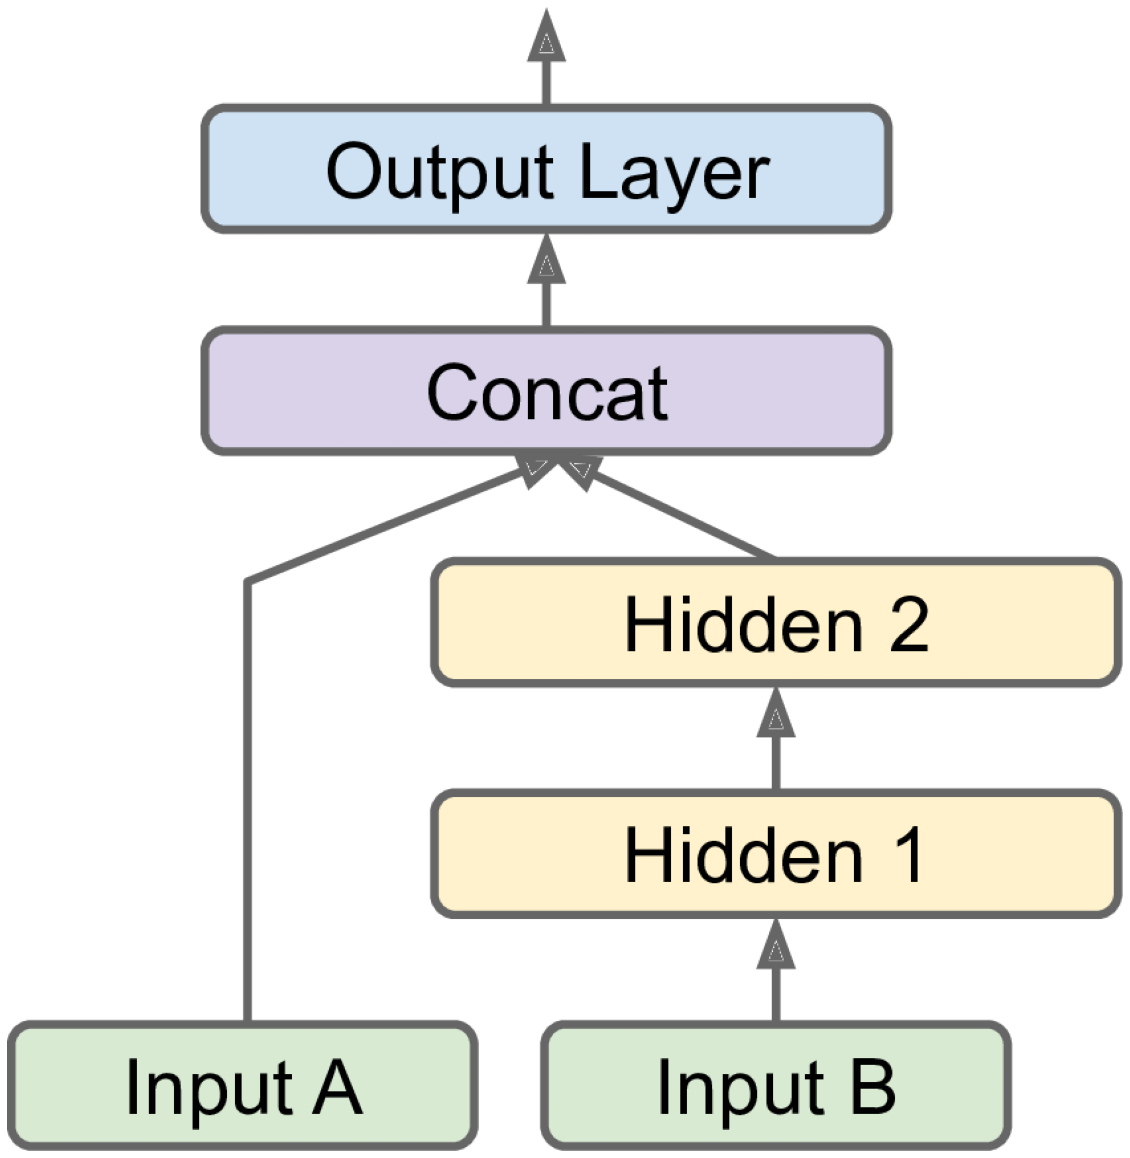

In [40]:
path='/home/aakashkhadka/Pictures/multiple_inputs.png'
img=plt.imread(path)
plt.figure(figsize=(20,25))
plt.axis('off')
plt.imshow(img)

In [41]:
X_train.shape

(11610, 8)

We have 8 features so setting 5 features along wide path ie(0,4) and six features through deep path
ie (2,7)

In [42]:
input_a=keras.layers.Input(shape=[5])
input_b=keras.layers.Input(shape=[6])
hidden1=keras.layers.Dense(30,activation='relu')(input_b)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
concat=keras.layers.Concatenate()([hidden2,input_a])
output=keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_a,input_b],outputs=output)

In [43]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(learning_rate=0.003))

In [44]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]


In [45]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3740 - val_loss: 0.6055
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5709 - val_loss: 0.5347
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5181 - val_loss: 0.5091
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4943 - val_loss: 0.4868
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4743 - val_loss: 0.4730
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4635 - val_loss: 0.4693
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4579 - val_loss: 0.4608
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4479 - val_loss: 0.4664
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4448 - val_loss: 0.4461
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4395 - val_loss: 0.4409

In [48]:
model.evaluate((X_test_A,X_test_B),y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4091


0.409076064825058

In [49]:
model.predict((X_new_A,X_new_B))

array([[0.68131673],
       [3.4088516 ],
       [1.5440186 ]], dtype=float32)

In [50]:
y_test[:3]

array([0.694, 4.   , 1.371])